In [4]:
! pip install optuna

In [5]:
! pip install xgboost

In [6]:
! pip install lightgbm

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [3]:
import os
print(os.getcwd())


c:\Users\Serita\OneDrive\Desktop\Phase 5 Capstone Project\PHASE_5_CAPSTONE_PROJECT\Notebooks


In [4]:
df_train = pd.read_csv('../Data/train.csv')
df_train.head(10)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
5,5,6,1022.7,20.6,18.6,16.5,12.5,79.0,81.0,0.0,20.0,15.7,1
6,6,7,1022.8,19.5,18.4,15.3,11.3,56.0,46.0,7.6,20.0,28.4,0
7,7,8,1019.7,15.8,13.6,12.7,11.8,96.0,100.0,0.0,50.0,52.8,1
8,8,9,1017.4,17.6,16.5,15.6,12.5,86.0,100.0,0.0,50.0,37.5,1
9,9,10,1025.4,16.5,14.4,12.0,8.6,77.0,84.0,1.0,50.0,38.3,0


In [5]:
df_train.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [ ]:
# preprocessing.py

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

def rename_columns(df_train):
    df_train = df_train.rename(columns={'temparature': 'temperature'})
    return df_train

def handle_missing_values(df_train):
    df_train['winddirection'] = df_train['winddirection'].fillna(df_train['winddirection'].median())
    return df_train

def create_cyclical_features(df_train):
    df_train['day_sin'] = np.sin(2 * np.pi * df['day'] / 365)
    df_train['day_cos'] = np.cos(2 * np.pi * df['day'] / 365)
    df = df_train.drop(columns=['day'])

def create_temp_range(df_train):
    df_train['temp_range'] = df_train['maxtemp'] - df_train['mintemp']

def detect_outliers(df_train, column):
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_train[(df_train[column] < lower_bound) | (df_train[column] > upper_bound)]
    return outliers

def plot_outliers(df_train, column):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

def run_full_preprocessing(df_train):
    rename_columns(df_train)
    handle_missing_values(df_train)
    create_cyclical_features(df_train)
    create_temp_range(df_train)
    return df_train.head()

In [11]:
def create_cyclical_features(df_train):
    df_train['day_sin'] = np.sin(2 * np.pi * df_train['day'] / 365)
    df_train['day_cos'] = np.cos(2 * np.pi * df_train['day'] / 365)
    df_train.drop(columns=['day'], inplace=True)

def run_full_preprocessing(df_train):
    rename_columns(df_train)

In [12]:
df_train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [13]:
df_train.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [14]:
X = df_train.drop(columns = ['id','rainfall'])
y = df_train['rainfall']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.3)

In [18]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Assuming X_train, y_train, X_test, y_test are already defined

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss')) #eval_metric added to avoid warning.
])

param_grid = {
    'model__n_estimators': [100, 300, 500],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__gamma': [0, 0.1, 0.2]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipe, param_grid, cv=cv, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)

best_pipe = grid_search.best_estimator_
y_pred_proba = best_pipe.predict_proba(X_test)[:, 1] # Probability for the positive class

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test ROC AUC (Best Model):", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)
print(f"AUC: {auc_score}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\Serita\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:54:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'model__colsample_bytree': 0.8, 'model__gamma': 0, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 300, 'model__subsample': 0.8}
Best ROC AUC: 0.902838769804287
Test ROC AUC (Best Model): 0.8724306489062692
AUC: 0.8724306489062692


Precision-Recall AUC: 0.941691572769596
F1-Score: 0.9112426035502958
Balanced Accuracy: 0.7857998289136013
Brier Score: 0.10957128093045149


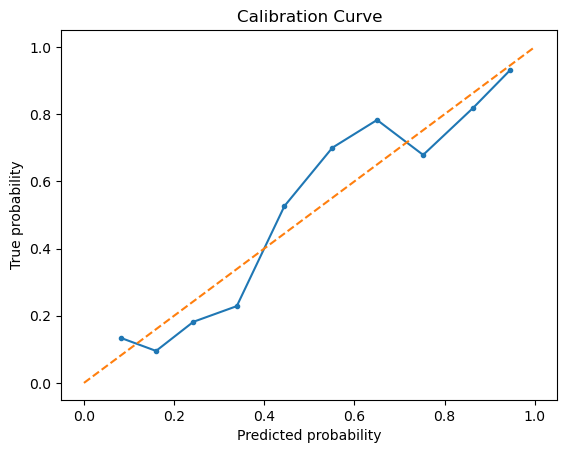

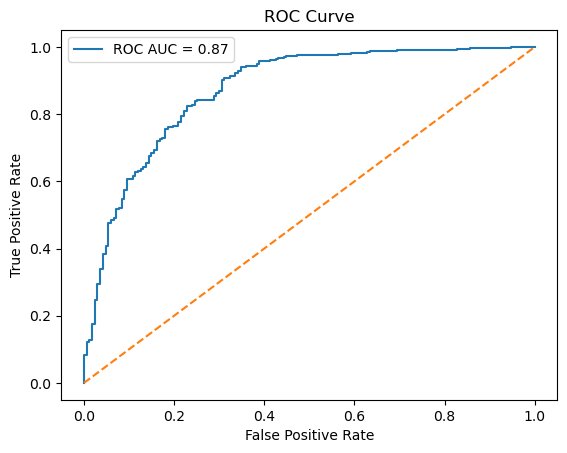

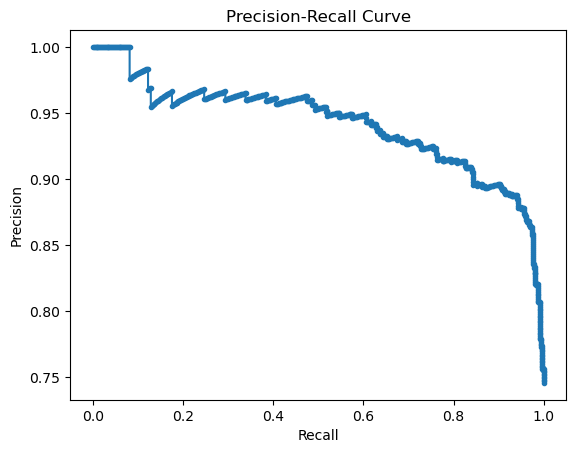

In [20]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, f1_score, balanced_accuracy_score, brier_score_loss
from sklearn.calibration import calibration_curve 
import matplotlib.pyplot as plt

# Assuming best_pipe, y_test, and y_pred_proba are defined from previous steps

y_pred = best_pipe.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
brier = brier_score_loss(y_test, y_pred_proba)
print(f"Brier Score: {brier}")

plt.plot(prob_pred, prob_true, marker='.')
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration Curve')
plt.show()

plt.plot(fpr, tpr, label=f'ROC AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [11]:
df_test = pd.read_csv('../Data/test.csv')
df_test.head(10)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4
5,2195,6,1027.1,15.6,12.6,11.5,9.0,76.0,94.0,0.0,20.0,41.4
6,2196,7,1022.6,15.5,13.7,10.7,11.8,79.0,95.0,0.0,20.0,43.1
7,2197,8,1013.5,20.5,16.2,15.2,13.1,94.0,93.0,0.2,70.0,41.3
8,2198,9,1021.3,16.3,13.2,11.3,10.8,85.0,99.0,0.1,20.0,34.0
9,2199,10,1026.1,10.4,8.5,7.0,3.1,69.0,88.0,0.0,20.0,26.4


In [17]:
df_cleaned_train = pd.read_csv('../Data/cleaned_train.csv')
df_cleaned_train.head(10)


,id,pressure,maxtemp,humidity,cloud,sunshine,windspeed,rainfall,day_sin,day_cos,...,winddir_240.0,winddir_250.0,winddir_250.3,winddir_260.0,winddir_270.0,winddir_280.0,winddir_290.0,winddir_300.0,humidity_index,windspeed_category
0,0,1017.4,0.421875,0.813559,88.0,1.1,0.232305,1,0.017213,0.999852,...,False,False,False,False,False,False,False,False,1.485362,NaN
1,1,1019.5,0.226562,0.949153,91.0,0.0,0.317604,1,0.034422,0.999407,...,False,False,False,False,False,False,False,False,2.407850,NaN
2,2,1024.1,0.351562,0.610169,47.0,8.3,0.248639,1,0.051620,0.998667,...,False,False,False,False,False,False,False,False,1.690240,NaN
3,3,1013.4,0.300781,0.949153,95.0,0.0,0.566243,1,0.068802,0.997630,...,False,False,False,False,False,False,False,False,2.199478,NaN
4,4,1021.8,0.425781,0.220339,45.0,3.6,0.370236,0,0.085965,0.996298,...,False,False,False,False,False,False,False,False,0.482743,NaN
5,5,1022.7,0.398438,0.677966,81.0,0.0,0.205082,1,0.103102,0.994671,...,False,False,False,False,False,False,False,False,1.458838,NaN
6,6,1022.8,0.355469,0.288136,46.0,7.6,0.435572,0,0.120208,0.992749,...,False,False,False,False,False,False,False,False,0.631279,NaN
7,7,1019.7,0.210938,0.966102,100.0,0.0,0.640653,1,0.137279,0.990532,...,False,False,False,False,False,False,False,False,3.755331,NaN
8,8,1017.4,0.281250,0.796610,100.0,0.0,0.600726,1,0.154309,0.988023,...,False,False,False,False,False,False,False,False,2.109704,NaN
9,9,1025.4,0.238281,0.644068,84.0,1.0,0.615245,0,0.171293,0.985220,...,False,False,False,False,False,False,False,False,2.217433,NaN


In [13]:
import pandas as pd
import numpy as np
import joblib
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Load the refined dataset
df_cleaned_train = pd.read_csv('../Data/cleaned_train.csv')

# Convert categorical features into numerical values
df_encoded = pd.get_dummies(df_cleaned_train, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['rainfall'])  # Exclude target variable
y = df_encoded['rainfall']  # Define target variable

# Check for NaN values
print("NaN values before handling:\n", X.isnull().sum())

# Handle NaN values (using mean imputation as an example)
X.fillna(X.max(), inplace=True)

# Verify that NaN values are handled
print("\nNaN values after handling:\n", X.isnull().sum())



NaN values before handling:
 id                       0
pressure                 0
maxtemp                  0
humidity                 0
cloud                    0
sunshine                 0
windspeed                0
day_sin                  0
day_cos                  0
temp_range               0
winddir_10.0             0
winddir_15.0             0
winddir_20.0             0
winddir_25.0             0
winddir_30.0             0
winddir_40.0             0
winddir_50.0             0
winddir_60.0             0
winddir_65.0             0
winddir_70.0             0
winddir_75.0             0
winddir_80.0             0
winddir_90.0             0
winddir_100.0            0
winddir_110.0            0
winddir_120.0            0
winddir_130.0            0
winddir_140.0            0
winddir_150.0            0
winddir_160.0            0
winddir_170.0            0
winddir_180.0            0
winddir_190.0            0
winddir_200.0            0
winddir_210.0            0
winddir_220.0            0

In [15]:
import pandas as pd

# Assuming your DataFrame is named 'df'
print(df_cleaned_train.isnull().sum())
# Assuming the column you want to remove is named 'column_name'
df_NNV = df_cleaned_train.drop('windspeed_category', axis=1, inplace=True)

df_NNV.head()


id                0
pressure          0
maxtemp           0
humidity          0
cloud             0
sunshine          0
windspeed         0
rainfall          0
day_sin           0
day_cos           0
temp_range        0
winddir_10.0      0
winddir_15.0      0
winddir_20.0      0
winddir_25.0      0
winddir_30.0      0
winddir_40.0      0
winddir_50.0      0
winddir_60.0      0
winddir_65.0      0
winddir_70.0      0
winddir_75.0      0
winddir_80.0      0
winddir_90.0      0
winddir_100.0     0
winddir_110.0     0
winddir_120.0     0
winddir_130.0     0
winddir_140.0     0
winddir_150.0     0
winddir_160.0     0
winddir_170.0     0
winddir_180.0     0
winddir_190.0     0
winddir_200.0     0
winddir_210.0     0
winddir_220.0     0
winddir_230.0     0
winddir_240.0     0
winddir_250.0     0
winddir_250.3     0
winddir_260.0     0
winddir_270.0     0
winddir_280.0     0
winddir_290.0     0
winddir_300.0     0
humidity_index    0
dtype: int64


KeyError: "['windspeed_category'] not found in axis"

In [ ]:
import pandas as pd
import numpy as np
import joblib
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Load the refined dataset
df_cleaned_train = pd.read_csv('../Data/cleaned_train.csv')

# Convert categorical features into numerical values
df_encoded = pd.get_dummies(df_cleaned_train, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['rainfall'])  # Exclude target variable
y = df_encoded['rainfall']  # Define target variable

# Check for infinite values and extremely large values
if np.isinf(X).sum().sum() > 0:
    print("Warning: Infinite values detected in X. Replacing with max finite values.")
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(X.max(), inplace=True)

# Check for missing values and fill them
if X.isnull().sum().sum() > 0:
    print("Warning: NaN values detected in X. Filling with column max values.")
    X.fillna(X.max(), inplace=True)

# Check for NaN values
print("NaN values before handling:\n", X.isnull().sum())

# Handle NaN values (using mean imputation as an example)
X.fillna(X.max(), inplace=True)

# Verify that NaN values are handled
print("\nNaN values after handling:\n", X.isnull().sum())

# Apply SMOTE for balancing classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature Selection using Recursive Feature Elimination (RFE)
xgb_selector = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)
rfe = RFE(estimator=xgb_selector, n_features_to_select=20)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_val_rfe = rfe.transform(X_val)

# Apply Polynomial Features Transformation
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_rfe)
X_val_poly = poly.transform(X_val_rfe)

# Define base models
xgb_model = XGBClassifier(n_estimators=800, learning_rate=0.0073, max_depth=12, 
                         min_child_weight=1, subsample=0.995, colsample_bytree=0.815, 
                         gamma=1.266, reg_alpha=4.248, reg_lambda=3.408, 
                         objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

lgbm_model = LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=10, 
                             subsample=0.9, colsample_bytree=0.8, random_state=42)

rf_model = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=2, 
                                     min_samples_leaf=2, bootstrap=False, random_state=42)

# Optuna Hyperparameter Tuning for Logistic Regression (final estimator)
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-5, 100)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    
    final_estimator = LogisticRegression(C=C, solver=solver, max_iter=1000)
    
    stacking_model = StackingClassifier(
        estimators=[('xgb', xgb_model), ('lgbm', lgbm_model), ('rf', rf_model)],
        final_estimator=final_estimator,
        cv=5, n_jobs=-1)
    
    return cross_val_score(stacking_model, X_train_poly, y_train, cv=3, scoring='f1').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
final_estimator = LogisticRegression(**best_params)

# Define Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[('xgb', xgb_model), ('lgbm', lgbm_model), ('rf', rf_model)],
    final_estimator=final_estimator,
    cv=5, n_jobs=-1)

# Train the stacked model with SMOTE and Polynomial Features
stacking_model.fit(X_train_poly, y_train)

# Make predictions
y_pred = stacking_model.predict(X_val_poly)
y_pred_proba = stacking_model.predict_proba(X_val_poly)[:, 1]

# Threshold Optimization for F1-score
best_f1 = 0
best_threshold = 0.5
for threshold in np.arange(0.1, 0.9, 0.01):
    y_pred_threshold = (y_pred_proba > threshold).astype(int)
    f1 = f1_score(y_val, y_pred_threshold)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

y_pred_best = (y_pred_proba > best_threshold).astype(int)

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred_best)
roc_auc = roc_auc_score(y_val, y_pred_proba)
report = classification_report(y_val, y_pred_best)

print(f"Final Stacking Model with SMOTE & Polynomial Features Accuracy: {accuracy:.4f}")
print(f"Final Stacking Model with SMOTE & Polynomial Features ROC AUC Score: {roc_auc:.4f}")
print("Final Stacking Model with SMOTE & Polynomial Features Classification Report:\n", report)

# Save

NaN values before handling:
 id                       0
pressure                 0
maxtemp                  0
humidity                 0
cloud                    0
sunshine                 0
windspeed                0
day_sin                  0
day_cos                  0
temp_range               0
winddir_10.0             0
winddir_15.0             0
winddir_20.0             0
winddir_25.0             0
winddir_30.0             0
winddir_40.0             0
winddir_50.0             0
winddir_60.0             0
winddir_65.0             0
winddir_70.0             0
winddir_75.0             0
winddir_80.0             0
winddir_90.0             0
winddir_100.0            0
winddir_110.0            0
winddir_120.0            0
winddir_130.0            0
winddir_140.0            0
winddir_150.0            0
winddir_160.0            0
winddir_170.0            0
winddir_180.0            0
winddir_190.0            0
winddir_200.0            0
winddir_210.0            0
winddir_220.0            0

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Load the cleaned dataset
cleaned_train_path = "../Data/cleaned_train.csv"
df_cleaned_train = pd.read_csv(cleaned_train_path)

# Convert categorical features into numerical values for MI calculation
df_encoded = pd.get_dummies(df_cleaned_train, drop_first=True)

df_encoded.head()

,id,pressure,maxtemp,humidity,cloud,sunshine,windspeed,rainfall,day_sin,day_cos,...,winddir_240.0,winddir_250.0,winddir_250.3,winddir_260.0,winddir_270.0,winddir_280.0,winddir_290.0,winddir_300.0,humidity_index,windspeed_category
0,0,1017.4,0.421875,0.813559,88.0,1.1,0.232305,1,0.017213,0.999852,...,False,False,False,False,False,False,False,False,1.485362,NaN
1,1,1019.5,0.226562,0.949153,91.0,0.0,0.317604,1,0.034422,0.999407,...,False,False,False,False,False,False,False,False,2.407850,NaN
2,2,1024.1,0.351562,0.610169,47.0,8.3,0.248639,1,0.051620,0.998667,...,False,False,False,False,False,False,False,False,1.690240,NaN
3,3,1013.4,0.300781,0.949153,95.0,0.0,0.566243,1,0.068802,0.997630,...,False,False,False,False,False,False,False,False,2.199478,NaN
4,4,1021.8,0.425781,0.220339,45.0,3.6,0.370236,0,0.085965,0.996298,...,False,False,False,False,False,False,False,False,0.482743,NaN
